In [1]:
# import the necessaries libariries 
import sys 
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


- Two block VGG Model 

In [2]:
# define cnn model 
def define_model(): 
    model=Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model 
    opt=SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

- Learning curves 

In [14]:
# plot diagnostic learning curves 
def summarize_diagnostics(history):
    # plot loss 
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file 
    filename=sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.legend()
    pyplot.tight_layout()
    pyplot.show()

In [4]:
# Run the test harness for evaluating a model 
#def run_test_harness():
    # define model 
    model=define_model()
    # create data generator 
    datagen=ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators 
    train_it=datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
                                        class_mode='binary', batch_size=32, target_size=(200, 200)) # advised batch_size=64
    test_it=datagen.flow_from_directory('dataset_dogs_vs_cats/test', 
                                       class_mode='binary', batch_size=32, target_size=(200, 200))
    
# entry point, run the test harness 
#run_test_harness()

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [5]:
# fit model 
history=model.fit_generator(test_it, steps_per_epoch=len(train_it),
                               validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    
# evaluate model 
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 100.000


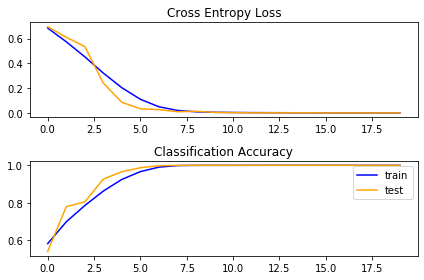

In [15]:
# learning curves
summarize_diagnostics(history)